# Estudo visualizando séries temporais

***

**Objetivos:**
- Conhecer conteito de séries temporais;
- Representar séries temporais através de gráficos de linha.

Em muitos conjuntos de dados, o momento em que cada dado foi observado, seja o minuto, hora, dia, mês ou ano, é uma informação relevante. Quando isso ocorre, existe uma ordem inata nos dados, do mais antigo para o mais recente. Essa estrutura sequencial deve ser levada em conta durante a análise desses dados, pois muitos padrões surgem a partir dessa análise, como ciclos, tendências e exceções.  
Dados que são coletados sequencialmente ao longo do tempo são denominados ***séries temporais***. Alguns exemplos de séries temporais são valores de ações de bolsas de valores, número de acessos diários em um site, nível da maré, vendas mensais de um dado produto, número de nascimentos diários, entre outros.

Iremos explorar um conjunto de dados reais de medidas feitas ao longo do tempo por diferentes tipos de sensores instalados dentro de um quarto;
Foram feitas medidas de temperatura, umidade, nível de iluminação e concentração de CO2 a cada minuto, durante 5 dias. Os dados originais são disponibilizados de forma aberta no repositório da Universidade da Califórnia, neste link: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+.

In [2]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [4]:
url = 'dados_occupancy.txt'
room = pd.read_csv(url)
room.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 18:49:59,22.290,27.3900,0.0,621.00,0.004559
1,2015-02-04 19:50:00,21.890,27.1000,0.0,548.50,0.004401
2,2015-02-04 20:50:00,21.600,26.4725,0.0,509.75,0.004222
3,2015-02-04 21:49:59,21.445,25.7450,0.0,488.00,0.004067
4,2015-02-04 22:50:00,21.290,25.7000,0.0,467.00,0.004021


- As colunas da tabela representam, da esquerda para a direita, a data da coleta do dado, a temperatura do quarto em graus Celsius, a umidade relativa do ar, o nível de luminosidade, a concentração de CO2 e a proporção de umidade, que é calculada a partir da umidade relativa e da temperatura.

- Gerando visuais para ver a variação da temperatura do quarto ao longo dos dias.

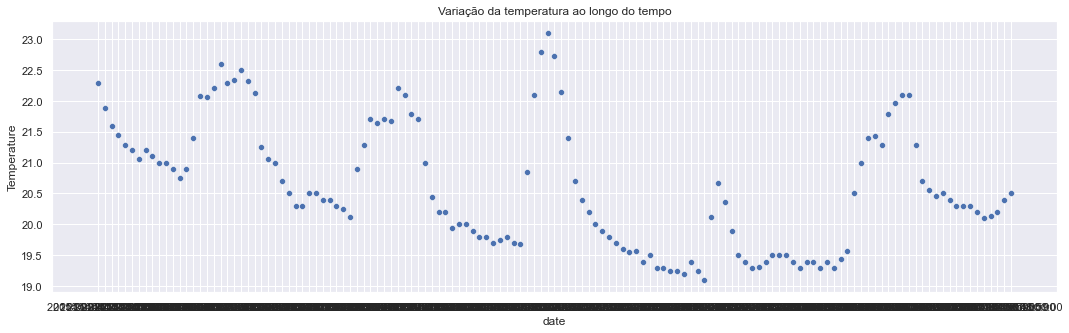

In [6]:
plt.figure(figsize=(18,5))
plt.title('Variação da temperatura ao longo do tempo')
sns.scatterplot(x='date', y='Temperature', data=room)
plt.show()

- As informações do eixo horizontal ficaram tão cheias que não é possível ler nada. Isso ocorre porque, ao ler os dados do arquivo, o pandas interpreta a data como um texto, uma variável categórica. Como, nesse caso, o tempo é contínuo, é necessário converter o valor para um tipo que o pandas reconheça como tempo, chamado **datetime**. Isso pode ser feito com a função do pandas **to_datetime().**

- Uma melhor abordagem para visualizar sequências é conectar cada ponto com uma linha, criando a percepção de continuidade. Esse gráfico é chamado de gráfico de linha, e pode ser criado com o seaborn através da função **lineplot()**.
- Vamos converter a coluna ‘date’ para um valor datetime e representar a temperatura do quarto ao longo do tempo com gráfico de linha.

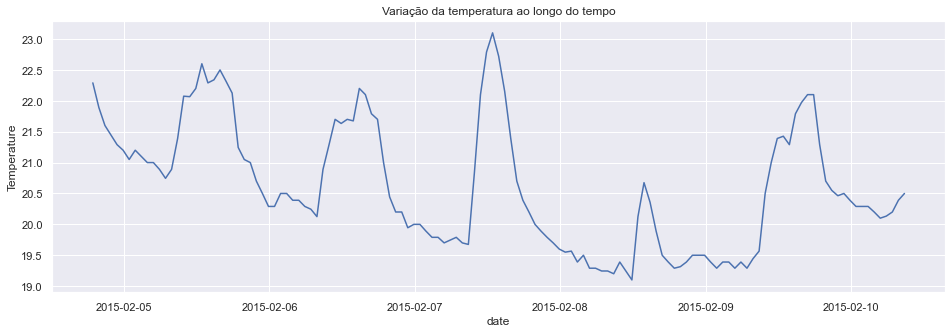

In [8]:
room['date'] = pd.to_datetime(room['date'])
plt.figure(figsize=(16,5))
plt.title('Variação da temperatura ao longo do tempo')
sns.lineplot(x='date',y='Temperature', data=room)
plt.show()

- Na linha 1 do código, a coluna ‘date’ é convertida ao tipo datetime, utilizado em Python para representar datas e horários.
- Note como a estrutura sequencial é percebida mais nitidamente no gráfico de linha. A partir dele, alguns padrões podem ser observados.
- Parece haver um ciclo diário na variação da temperatura, que diminui durante a madrugada, cresce durante o dia, atinge o pico pela tarde e passa a diminuir até o fim do dia. Observe que houve uma mudança de comportamento no dia 07, com um pico incomum, que pode ter sido causado pela variáveis externas ou presença de pessoas no quarto.

  Um detalhe importante sobre essa série temporal: é que foi feita exatamente uma medição em cada momento. Isso nem sempre é o caso. Por exemplo, como as medidas de sensores variam conforme a calibração, poderia ter utilizado mais de um sensor de temperatura, tirando mais de uma medição por momento, para se obter um resultado mais preciso.

---

Vamos verificar como isso ocorre utilizando um outro conjunto de dados como exemplo.
Esses dados foram coletados pelo Banco Mundial e contém informações sobre a incidência do vírus HIV ao longo de mais de 20 anos para diversos países. Vamos carregar e exibir as primeiras linhas desses dados.

In [15]:
hiv= pd.read_csv('hiv_data.txt')
hiv.head()

,country,date,HIV Rate,Income Level
0,Australia,2017,0.1,HIC
1,Australia,2016,0.1,HIC
2,Australia,2015,0.1,HIC
3,Australia,2014,0.1,HIC
4,Australia,2013,0.1,HIC


- HIV Rate = taxa de HIV
- Income Level= Uma classificação socioeconômica de nível de renda médio da população, que pode ser HIC (alto nível de renda), MIC (médio nível de renda) e LIC (baixo nível de renda.

Com esses dados, iremos explorar a tendência da taxa de HIV ao longo dos anos no mundo, por nível de renda ou por países individualmente.
Ao criar um gráfico com a taxa de HIV global, são consideradas, para cada ano, as medições em vários países.

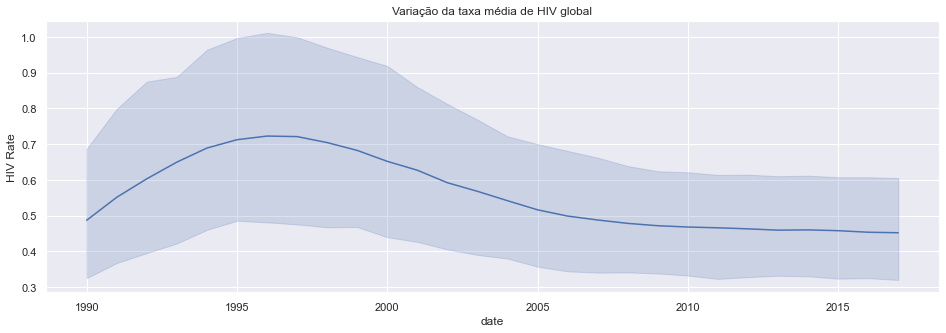

In [16]:
plt.figure(figsize=(16,5))
plt.title('Variação da taxa média de HIV global')
sns.lineplot(x='date', y='HIV Rate', data=hiv)
plt.show()

- Existem diversas taxas de HIV em cada ano, correspondente à taxa de cada país. Quando há múltiplas medições em um mesmo tempo, a função lineplot() exibe por padrão uma linha formada pela média de todos os valores em cada tempo. Como os dados podem variar em torno da média, é exibido também um **intervalo de confiança** na forma de uma área sombreada, indicando a região provável em que se encontram os dados. Grandes áreas sombreadas indicam que os dados variam muito.  

  Considere agora o gráfico resultante. O intervalo de confiança grande indica que as taxas variam bastante entre os países. Nota-se que houve uma tendência global, onde a taxa média de HIV estava em crescimento na primeira metade dos anos 90, atingindo o pico na segunda metade e passando a decrescer. Por volta da segunda metade dos anos 2000, a taxa passou a decair bem mais lentamente. Esse gráfico mostra uma tendência mundial.

Visualização mostrando apenas a linha da média sem o intervalo de confiança, que pode ser alterando o parâmetro **ci (confidence interval)**, passando o valor 'None'.

- Além da taxa média global, estamos interessados nas taxas médias por nível de renda dos países. A função lineplot() possui a mesma flexibilidade da função scatterplot(), podendo representar variáveis categóricas pela cor, tamanho ou forma, através dos parâmetros *hue, size e style*, respectivamente. Por exemplo, para visualizar as taxas por níveis de renda, basta passar a coluna ‘Income Level’ para o parâmetro hue, para que a função desenhe uma curva de cor diferente referente a cada nível.

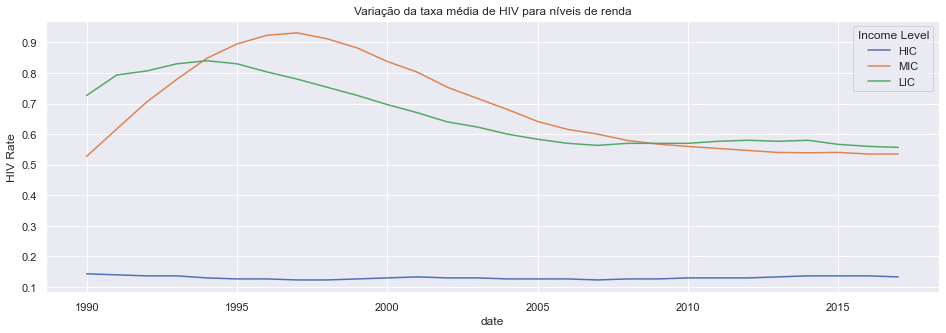

In [18]:
plt.figure(figsize=(16,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x='date', y='HIV Rate', hue='Income Level', ci=None, data=hiv)
plt.show()

Observação:
- Os países com média renda tiveram um pico maior no gráfico.
- Os países de alta renda, se mantiveram estáveis, com uma baixa taxa média durante o perído analisado.
- Os países com renda média atingiram o pico mais cedo que os países de baixa renda e logo passaram a decrescer sua taxa. Logo após os anos 1995, a taxa dos países de baixa renda fica abaixo dos de média e se mantém assim até próximo o ano de 2010, ficando ligeiramente acima de média renda até o final dos dados.
- Talvez essa queda na taxa dos países de baixa renda tenha se devido a eficientes políticas de saúde pública. Todavia é preciso investigar se ocorreu somente em alguns países ou foi uma tendência geral.

Assim como no caso dos gráficos de dispersão, é prudente evitar representar muitas variáveis simultaneamente no mesmo gráfico de linha, pois a visualização corre o risco de ficar poluída e confusa com o excesso de informação. Esse cuidado deve ser maior ainda quando existem muitas categorias possíveis para uma dada variável. Por exemplo, digamos que você queira visualizar uma série temporal distinta para a taxa de HIV de cada país. Pode-se passar a coluna ‘country’ para o parâmetro hue.

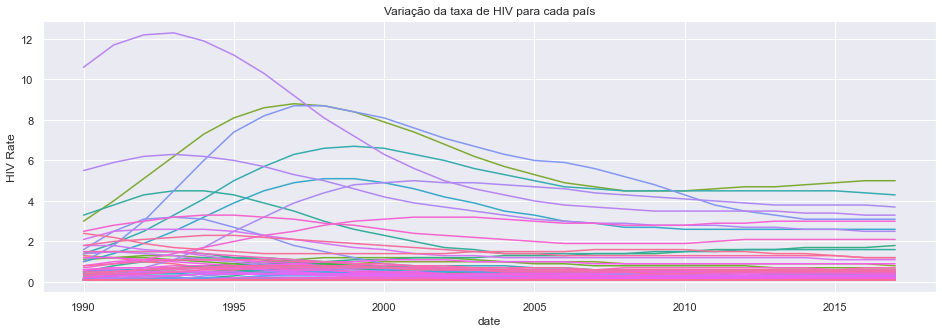

In [22]:
plt.figure(figsize=(16,5))
plt.title('Variação da taxa de HIV para cada país')
sns.lineplot(x='date', y='HIV Rate', hue='country', legend = False, data=hiv)
# valor False indicando que a legenda não deve ser exibida, pois são muidos países para apresentar.
plt.show()

- Visualizar muitas categorias em gráficos de linha pode ser útil para perceber padrões que se destacam. Porém, note que nos países que tiveram comportamento similar é difícil perceber padrões em meio ao emaranhado de linhas sobrepostas. Nessas situações, pode ser útil trabalhar com subgrupos menores.